In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 31 20:09:24 2019

@author: Alan Hurtarte
"""
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import pandas as pd
data = np.load('proyecto_training_data.npy')
train_data_length = (int)(data.shape[0] * 0.8)
train_data = data[0:train_data_length,:]
test_data = data[train_data_length:,:]

sale_price_td = train_data[:,0]
overall_quality_td = train_data[:,1]
first_floor_square_feet_td = train_data[:,2]
total_rooms_td = train_data[:,3]
year_built_td = train_data[:,4]
loat_front_td = np.nan_to_num(train_data[:,5])

def get_mean_max_min_range_dv(nd_array):
    mean = np.mean(nd_array)
    c_max = np.max(nd_array)
    c_min = np.min(nd_array)
    c_range = np.ptp(nd_array)
    dv = np.std(nd_array)
    return (mean, c_max, c_min, c_range, dv)

def statistics_outputter(statistics, name):
    print('Statistics of %s' % name)
    print('Mean: %f' % statistics[0])
    print('Max: %f' % statistics[1])
    print('Mean: %f' % statistics[2])
    print('Range: %f' % statistics[3])
    print('Standar deviation: %f' % statistics[4])

def print_hr():
    print('***************************************************')
    
sale_price_statistics = get_mean_max_min_range_dv(sale_price_td)
overall_quality_statistics = get_mean_max_min_range_dv(overall_quality_td)
first_floor_square_feet_statistics = get_mean_max_min_range_dv(first_floor_square_feet_td)
total_rooms_statistics = get_mean_max_min_range_dv(total_rooms_td)
year_built_statisctics = get_mean_max_min_range_dv(year_built_td)
loat_front_statistics = get_mean_max_min_range_dv(loat_front_td)

print_hr()
statistics_outputter(sale_price_statistics, 'Sale price')
print_hr()
statistics_outputter(overall_quality_statistics, 'Overall material and finish quality')
print_hr()
statistics_outputter(first_floor_square_feet_statistics, 'First Floor square')
print_hr()
statistics_outputter(total_rooms_statistics, 'Total rooms')
print_hr()
statistics_outputter(year_built_statisctics, 'year_built_statisctics')
print_hr()
statistics_outputter(loat_front_statistics, 'loat_front_statistics')


***************************************************
Statistics of Sale price
Mean: 180590.277397
Max: 755000.000000
Mean: 34900.000000
Range: 720100.000000
Standar deviation: 78781.951080
***************************************************
Statistics of Overall material and finish quality
Mean: 6.101027
Max: 10.000000
Mean: 1.000000
Range: 9.000000
Standar deviation: 1.377435
***************************************************
Statistics of First Floor square
Mean: 1156.323630
Max: 3228.000000
Mean: 334.000000
Range: 2894.000000
Standar deviation: 373.620332
***************************************************
Statistics of Total rooms
Mean: 6.485445
Max: 14.000000
Mean: 2.000000
Range: 12.000000
Standar deviation: 1.608452
***************************************************
Statistics of year_built_statisctics
Mean: 1971.451199
Max: 2010.000000
Mean: 1875.000000
Range: 135.000000
Standar deviation: 29.938882
***************************************************
Statistics of loat_front_s

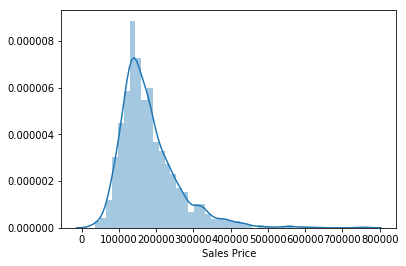

In [18]:
sale_price_td_pd = pd.Series(sale_price_td, name="Sales Price")
ax = sns.distplot(sale_price_td_pd)

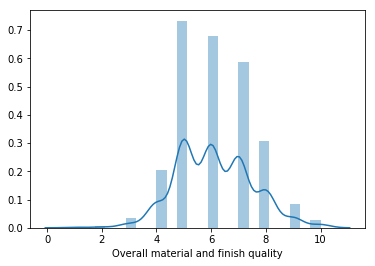

In [13]:
overall_quality_td_pd = pd.Series(overall_quality_td, name="Overall material and finish quality")
sns.distplot(overall_quality_td_pd)


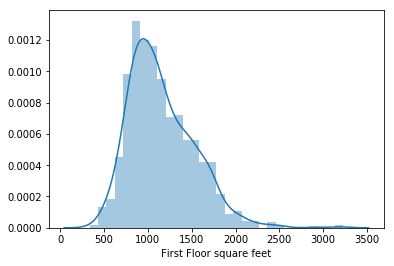

In [14]:
first_floor_square_feet_td_pd = pd.Series(first_floor_square_feet_td, name="First Floor square feet")
sns.distplot(first_floor_square_feet_td_pd)

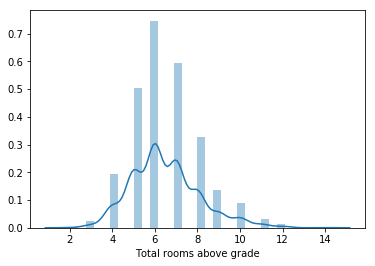

In [15]:
total_rooms_td_pd = pd.Series(total_rooms_td, name="Total rooms above grade")
sns.distplot(total_rooms_td_pd)

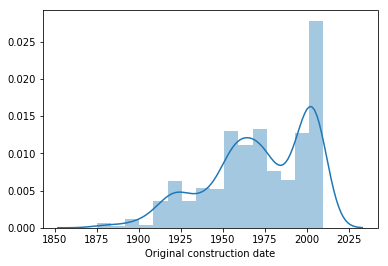

In [16]:
year_built_td_pd = pd.Series(year_built_td, name="Original construction date")
sns.distplot(year_built_td_pd)

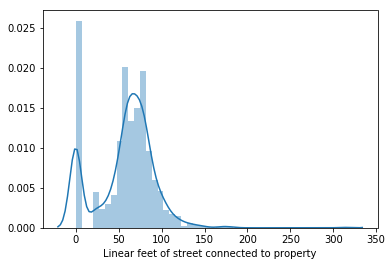

In [17]:
loat_front_td_pd = pd.Series(loat_front_td, name="Linear feet of street connected to property")
sns.distplot(loat_front_td_pd)